## 주식 데이터 분석 - 야후 finance
[yahoo finance - naver url](https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS)

In [168]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import pandas as pd

req = Request(
    'https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS',
    headers = {'User-Agent' : 'Chrome'}
)
page = urlopen(req).read()

soup = BeautifulSoup(page, 'html.parser')
table = soup.find('table')  # table tag
df_raw = pd.read_html(str(table))[0]        # html의 table을 가져옴
df_raw.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Aug 04, 2022",272500.00,278000.00,271000.00,271500.00,271500.00,723790
1,"Aug 03, 2022",-,-,-,-,-,-
2,"Aug 02, 2022",260500.00,260500.00,254000.00,259000.00,259000.00,551218
3,"Aug 01, 2022",260500.00,261500.00,256500.00,259000.00,259000.00,532517
4,"Jul 29, 2022",252000.00,262000.00,251500.00,259000.00,259000.00,1105156


In [169]:
# 종가(Close*)를 기준으로 정렬하기
df_tmp = pd.DataFrame({'ds':df_raw['Date'], 'y':df_raw['Close*']})
df_tmp.head()

,ds,y
0,"Aug 04, 2022",271500.00
1,"Aug 03, 2022",-
2,"Aug 02, 2022",259000.00
3,"Aug 01, 2022",259000.00
4,"Jul 29, 2022",259000.00


In [170]:
df_target = df_tmp[:-1]
df_target.head()

,ds,y
0,"Aug 04, 2022",271500.00
1,"Aug 03, 2022",-
2,"Aug 02, 2022",259000.00
3,"Aug 01, 2022",259000.00
4,"Jul 29, 2022",259000.00


---

In [171]:
df = df_target.copy()   # hard copy 하고
df['ds'] = pd.to_datetime(df_target['ds'], format='%b %d, %Y')  # 날짜를 fbprophet의 형태로 바꿈
df.head()

,ds,y
0,2022-08-04,271500.00
1,2022-08-03,-
2,2022-08-02,259000.00
3,2022-08-01,259000.00
4,2022-07-29,259000.00


In [172]:
df.info()       # y 컬럼의 데이터가 문자열로 잡혀있음 >> float 형태로 바꿔야 한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ KB


In [173]:
# df['y'] = df['y'].astype('float')       # y값 중 '-' 값이 float 형태로 바뀌지 않게 방해


---


#### y의 값이 숫자가 아닌 것들을 빼고 다시 생성하기

In [174]:
df_tmp_ = df_tmp[df_tmp['y'] != '-'][:-1].reset_index()
df_tmp_

,index,ds,y
0,0,"Aug 04, 2022",271500.00
1,2,"Aug 02, 2022",259000.00
2,3,"Aug 01, 2022",259000.00
3,4,"Jul 29, 2022",259000.00
4,5,"Jul 28, 2022",247000.00
...,...,...,...
94,95,"Mar 18, 2022",344500.00
95,96,"Mar 17, 2022",329000.00
96,97,"Mar 16, 2022",329000.00
97,98,"Mar 15, 2022",329000.00


In [175]:
df_tmp_ = pd.DataFrame(df_tmp_, columns=['ds', 'y'])
df_tmp_

,ds,y
0,"Aug 04, 2022",271500.00
1,"Aug 02, 2022",259000.00
2,"Aug 01, 2022",259000.00
3,"Jul 29, 2022",259000.00
4,"Jul 28, 2022",247000.00
...,...,...
94,"Mar 18, 2022",344500.00
95,"Mar 17, 2022",329000.00
96,"Mar 16, 2022",329000.00
97,"Mar 15, 2022",329000.00


In [176]:
df = df_tmp_.copy()
df['ds'] = pd.to_datetime(df['ds'], format='%b %d, %Y')
df.head()

,ds,y
0,2022-08-04,271500.00
1,2022-08-02,259000.00
2,2022-08-01,259000.00
3,2022-07-29,259000.00
4,2022-07-28,247000.00


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      99 non-null     datetime64[ns]
 1   y       99 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ KB


In [178]:
# 'y' 컬럼의 데이터 float 형태로 바꾸기
df['y'] = df['y'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      99 non-null     datetime64[ns]
 1   y       99 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [179]:
df.head()

,ds,y
0,2022-08-04,271500.0
1,2022-08-02,259000.0
2,2022-08-01,259000.0
3,2022-07-29,259000.0
4,2022-07-28,247000.0


In [180]:
df.tail()

,ds,y
94,2022-03-18,344500.0
95,2022-03-17,329000.0
96,2022-03-16,329000.0
97,2022-03-15,329000.0
98,2022-03-14,329000.0


---
### prophet 해보기

In [181]:
from fbprophet import Prophet

In [182]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
# m.fit(df);        # macM1 에서 해당 구문에서 kernel 충돌 일어남!

In [183]:
m.fit(df);

In [184]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
124,2022-08-30,7.174519e+06,7.166942e+06,7.181834e+06
125,2022-08-31,7.735002e+06,7.727836e+06,7.741675e+06
126,2022-09-01,8.287085e+06,8.279254e+06,8.294831e+06
127,2022-09-02,8.826396e+06,8.818923e+06,8.833677e+06
128,2022-09-03,9.097843e+06,9.090002e+06,9.105286e+06


In [185]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

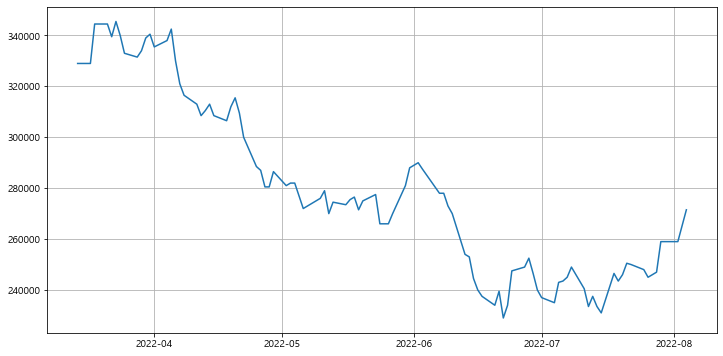

In [186]:
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label='real')
plt.grid()
plt.show()

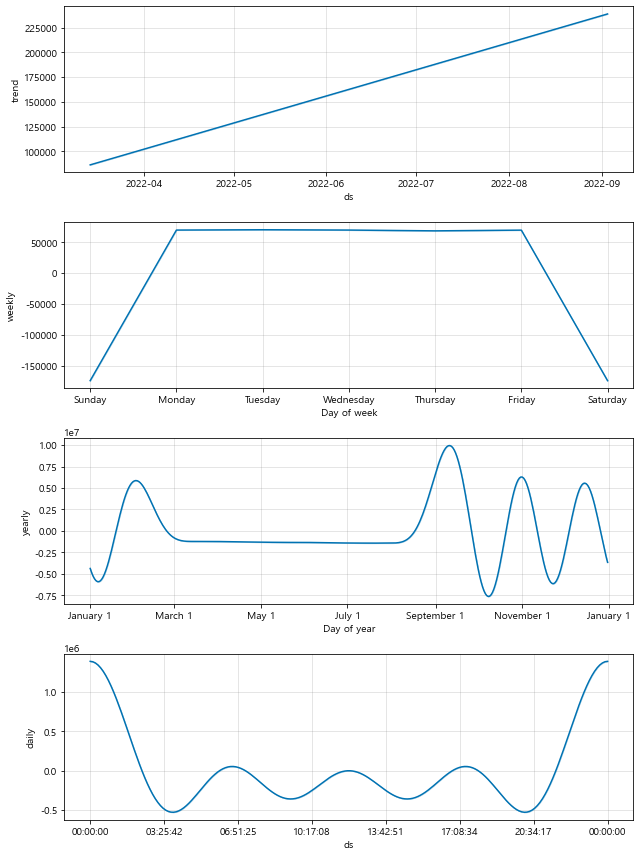

In [187]:
m.plot_components(forecast);

In [188]:
from pandas_datareader import data
import yfinance as yf

yf.pdr_override()

start_date = '2010-03-01'
end_date = '2018-02-28'
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [189]:
KIA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,22050.0,22300.0,21800.0,21850.0,17168.685547,3935516
2010-03-03,22100.0,22450.0,21850.0,22400.0,17600.849609,4380617
2010-03-04,22400.0,22600.0,22300.0,22500.0,17679.423828,2490087
2010-03-05,22500.0,22750.0,22350.0,22750.0,17875.861328,2379282
2010-03-08,23050.0,23100.0,22500.0,22800.0,17915.148438,4326618


<AxesSubplot:xlabel='Date'>

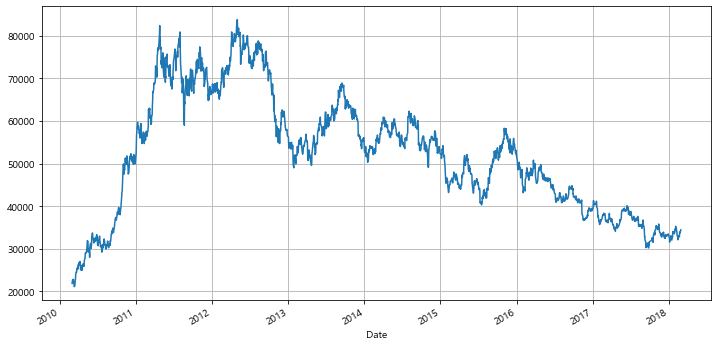

In [190]:
KIA['Close'].plot(figsize=(12,6), grid=True)

In [191]:
# training data // 2017-12-01 부터 마지막까지는 test data로 사용할 예정
KIA_trunc = KIA[:'2017-11-30']
KIA_trunc.head();       

#### Prophet 을 위한 데이터 준비

In [192]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y' : KIA_trunc['Close']})
df.reset_index(inplace=True)
# df.head()
del df['Date']
df.head()

,ds,y
0,2010-03-02,21850.0
1,2010-03-03,22400.0
2,2010-03-04,22500.0
3,2010-03-05,22750.0
4,2010-03-08,22800.0


In [193]:
m = Prophet(yearly_seasonality=True, daily_seasonality = True)
m.fit(df);

In [194]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2003,2018-02-24,26941.910838,22867.588625,31022.907031
2004,2018-02-25,27027.517307,23179.379191,31232.314476
2005,2018-02-26,27228.793939,22970.778282,31433.347376
2006,2018-02-27,27397.261872,23289.954091,31773.423907
2007,2018-02-28,27444.142597,23181.707524,31913.851812


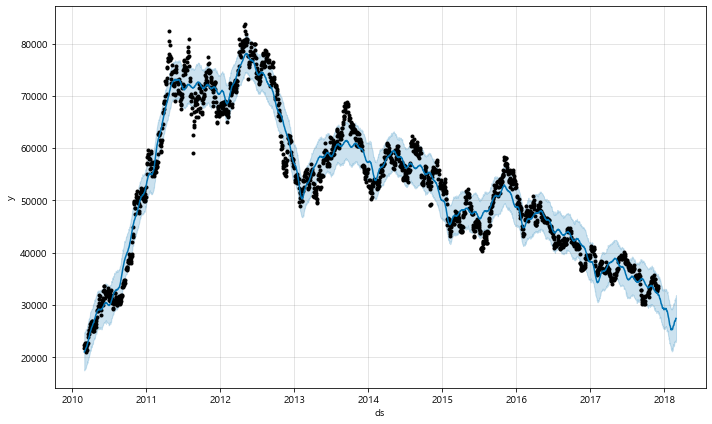

In [195]:
m.plot(forecast);

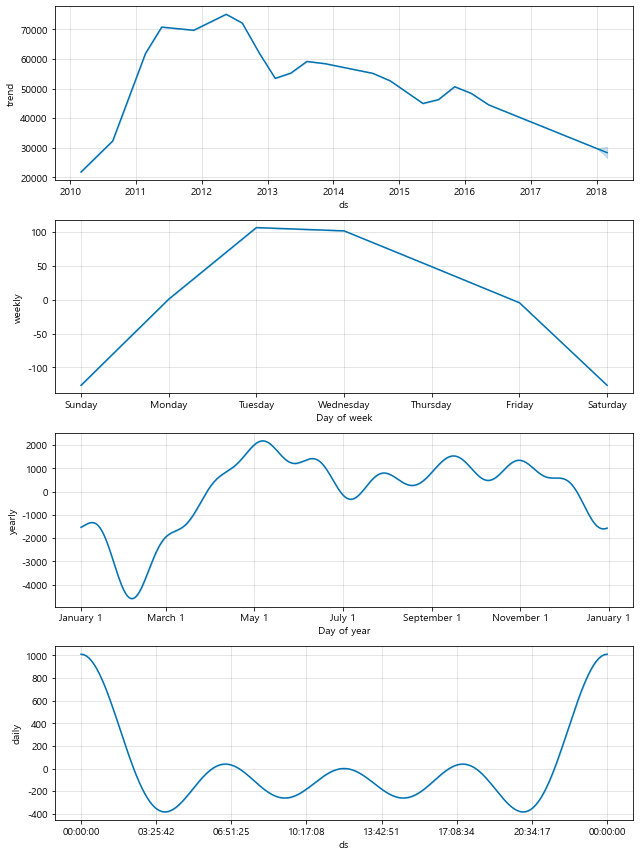

In [196]:
m.plot_components(forecast);

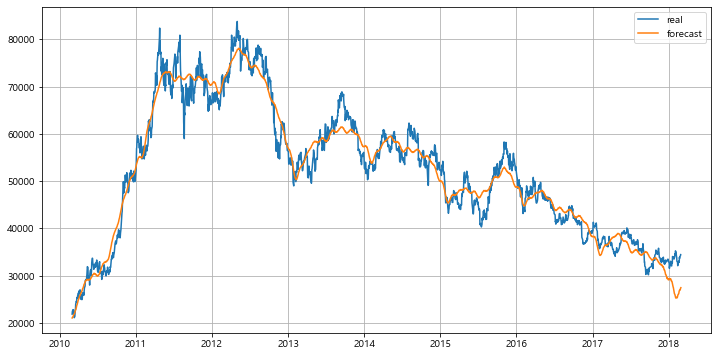

In [197]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

#### 대한항공 주식 예측

In [198]:
# 003490 대한항공
start_date = '2010-03-01'
end_date = '2018-02-28'
KoreaAir = data.get_data_yahoo('003490.KS', start_date, end_date)
KoreaAir.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,58192.625000,59390.417969,58192.625000,59390.417969,58454.984375,303805
2010-03-03,59090.968750,59490.230469,58691.707031,59190.785156,58258.496094,189214
2010-03-04,58991.152344,60188.941406,58891.335938,59290.601562,58356.738281,357038
2010-03-05,59290.601562,61087.285156,59290.601562,60588.207031,59633.906250,782451
2010-03-08,61286.917969,63083.601562,61087.285156,62784.152344,61795.265625,945708


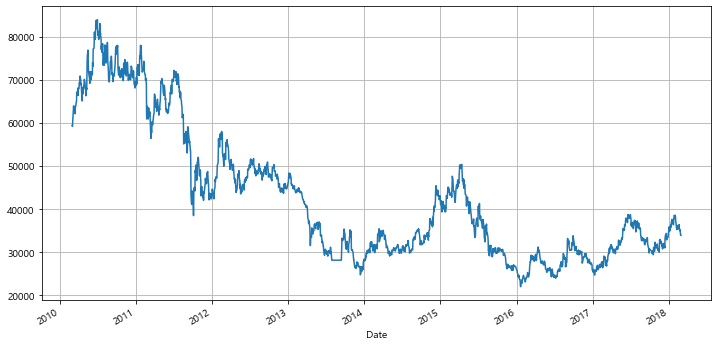

In [199]:
KoreaAir['Close'].plot(figsize=(12,6), grid=True);

In [200]:
# train / test 데이터 분리
KoreaAir_trunc = KoreaAir[:'2017-11-30']
KoreaAir_trunc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,58192.625000,59390.417969,58192.625000,59390.417969,58454.984375,303805
2010-03-03,59090.968750,59490.230469,58691.707031,59190.785156,58258.496094,189214
2010-03-04,58991.152344,60188.941406,58891.335938,59290.601562,58356.738281,357038
2010-03-05,59290.601562,61087.285156,59290.601562,60588.207031,59633.906250,782451
2010-03-08,61286.917969,63083.601562,61087.285156,62784.152344,61795.265625,945708


In [201]:
df = pd.DataFrame({'ds':KoreaAir_trunc.index, 'y':KoreaAir_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2010-03-02,59390.417969
1,2010-03-03,59190.785156
2,2010-03-04,59290.601562
3,2010-03-05,60588.207031
4,2010-03-08,62784.152344


In [202]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [203]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2003,2018-02-24,34885.595354,30523.033364,39145.982477
2004,2018-02-25,34790.953381,30511.154250,38977.220557
2005,2018-02-26,35763.113516,31581.906196,40379.779260
2006,2018-02-27,35606.628578,31723.588476,40250.684697
2007,2018-02-28,35527.670397,31232.205038,39811.271106


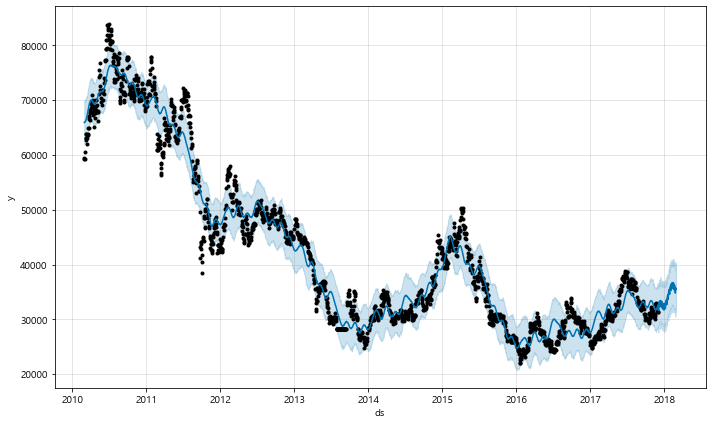

In [204]:
m.plot(forecast);

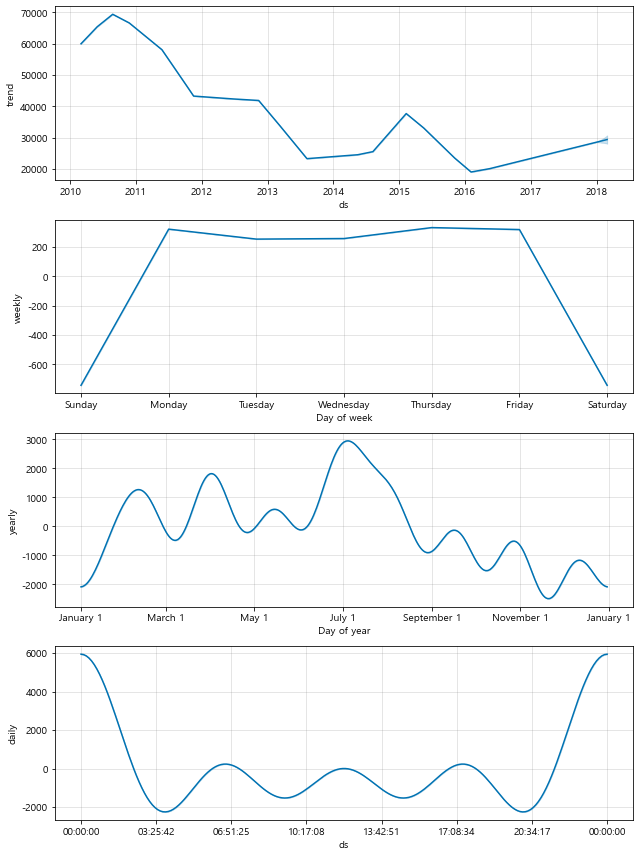

In [205]:
m.plot_components(forecast);

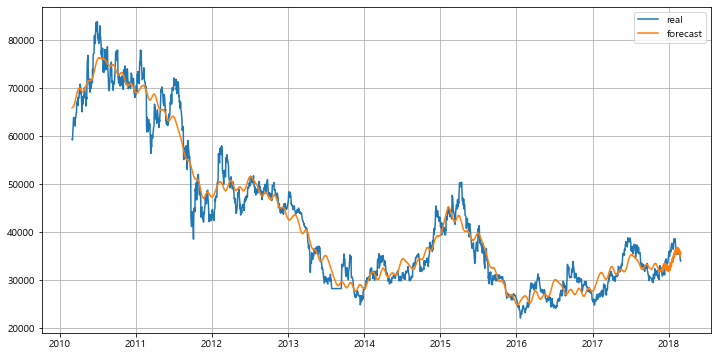

In [206]:
# 실제 데이터와 예측값 비교
plt.figure(figsize=(12,6))
plt.plot(KoreaAir.index, KoreaAir['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

---
## 번외 - ENDP, ATHX 정보 가져오기


In [207]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

url_endp = 'https://finance.yahoo.com/quote/ENDP/history?p=ENDP'
url_athx = 'https://finance.yahoo.com/quote/ATHX/history?p=ATHX'

req_endp = Request(url_endp, headers={'User-Agent':'Chrome'})
req_athx = Request(url_athx, headers={'User-Agent':'Chrome'})

# ================ #

html_endp = urlopen(req_endp).read()
soup_endp = BeautifulSoup(html_endp, 'html.parser')

html_athx = urlopen(req_athx).read()
soup_athx = BeautifulSoup(html_athx, 'html.parser')


#### endp dataframe 가져오기

In [208]:
table_endp = soup_endp.find('table')
df_raw_endp = pd.read_html(str(table_endp))[0]
df_raw_endp.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Aug 03, 2022",0.6300,0.9400,0.6200,0.7500,0.7500,149002700
1,"Aug 02, 2022",0.5200,0.6100,0.5100,0.5800,0.5800,47916000
2,"Aug 01, 2022",0.5200,0.5300,0.4900,0.5200,0.5200,13115300
3,"Jul 29, 2022",0.5200,0.5600,0.5000,0.5300,0.5300,21416200
4,"Jul 28, 2022",0.5200,0.5500,0.4700,0.5300,0.5300,39448800


In [209]:
df_endp_tmp = pd.DataFrame({'ds':df_raw_endp['Date'], 'y':df_raw_endp['Close*']})
df_endp_tmp.head()

,ds,y
0,"Aug 03, 2022",0.7500
1,"Aug 02, 2022",0.5800
2,"Aug 01, 2022",0.5200
3,"Jul 29, 2022",0.5300
4,"Jul 28, 2022",0.5300


In [210]:
df_endp_target = df_endp_tmp[:-1]
df_endp_target.head()

,ds,y
0,"Aug 03, 2022",0.7500
1,"Aug 02, 2022",0.5800
2,"Aug 01, 2022",0.5200
3,"Jul 29, 2022",0.5300
4,"Jul 28, 2022",0.5300


### date형태 바꾸기

In [211]:
df_endp = df_endp_target.copy()

In [212]:
df_endp['ds'] = pd.to_datetime(df_endp['ds'], format='%b %d, %Y')
df_endp.head()

,ds,y
0,2022-08-03,0.7500
1,2022-08-02,0.5800
2,2022-08-01,0.5200
3,2022-07-29,0.5300
4,2022-07-28,0.5300


In [213]:
df_endp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ KB


In [214]:
df_endp['y'] = df_endp['y'].astype('float')
df_endp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [215]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df_endp);

In [216]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
# forecast.columns
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,trend,yhat,yhat_lower,yhat_upper
0,2022-03-11,2.285540,2.257359,2.098459,2.437591
1,2022-03-14,2.251425,2.260039,2.096390,2.423967
2,2022-03-15,2.240054,2.301510,2.140509,2.464159
3,2022-03-16,2.228682,2.294648,2.131254,2.472681
4,2022-03-17,2.217310,2.301397,2.141855,2.477188


In [217]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

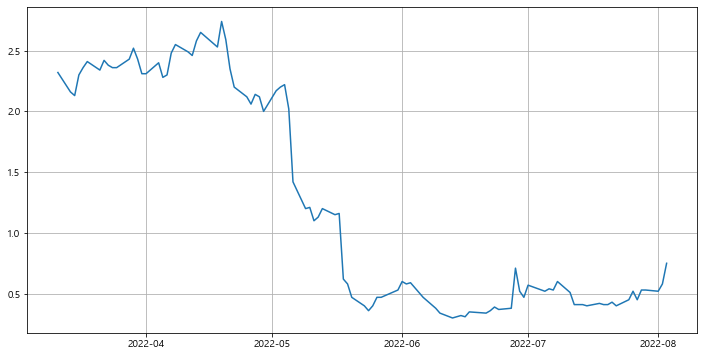

In [218]:
plt.figure(figsize=(12,6))
plt.plot(df_endp['ds'], df_endp['y'], label='real')
plt.grid()
plt.show()

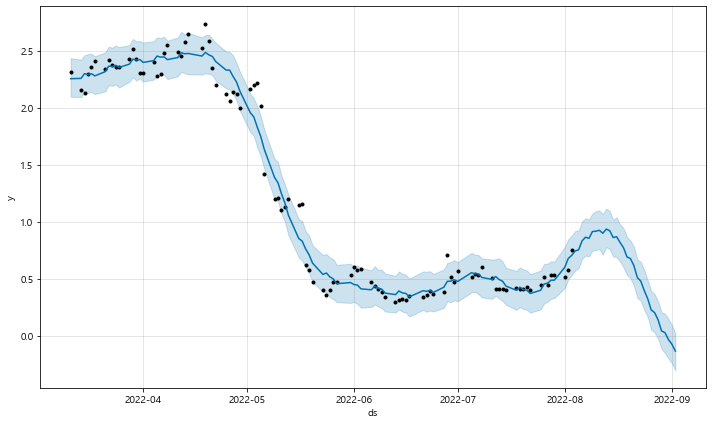

In [219]:
m.plot(forecast);

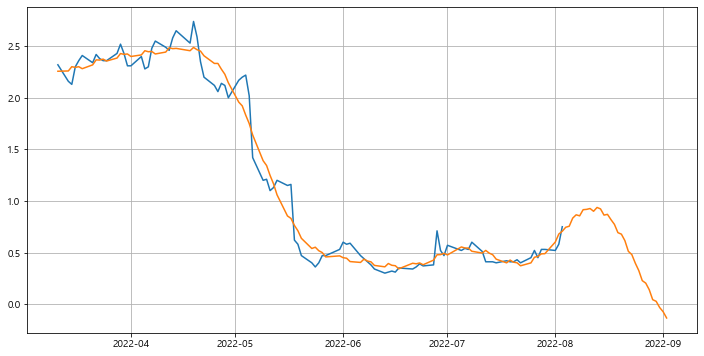

In [220]:
plt.figure(figsize=(12,6))
plt.plot(df_endp['ds'], df_endp['y'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.show()

### ATHX 예측하기

In [221]:
table_athx = soup_athx.find('table')
df_raw_athx = pd.read_html(str(table_athx))[0]
# df_raw_athx.head()

df_athx_tmp = pd.DataFrame({'ds':df_raw_athx['Date'], 'y':df_raw_athx['Close*']})
# df_athx_tmp.head()

df_athx_target = df_athx_tmp[:-1]

df_athx = df_athx_target.copy()

df_athx['ds'] = pd.to_datetime(df_athx['ds'], format='%b %d, %Y')
# df_athx.head()

# df_athx.info()
df_athx['y'] = df_athx['y'].astype('float')
df_athx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [222]:
from fbprophet import Prophet
m_athx = Prophet(yearly_seasonality=True, daily_seasonality=True)
m_athx.fit(df_athx);

In [223]:
future = m_athx.make_future_dataframe(periods=30)
forecast = m_athx.predict(future)

In [224]:
forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,trend,yhat,yhat_lower,yhat_upper
0,2022-03-11,0.733174,0.717653,0.630977,0.808933
1,2022-03-14,0.723663,0.759367,0.673412,0.847434
2,2022-03-15,0.720493,0.740082,0.654128,0.832290
3,2022-03-16,0.717323,0.733664,0.640793,0.814451
4,2022-03-17,0.714153,0.742393,0.647034,0.834071


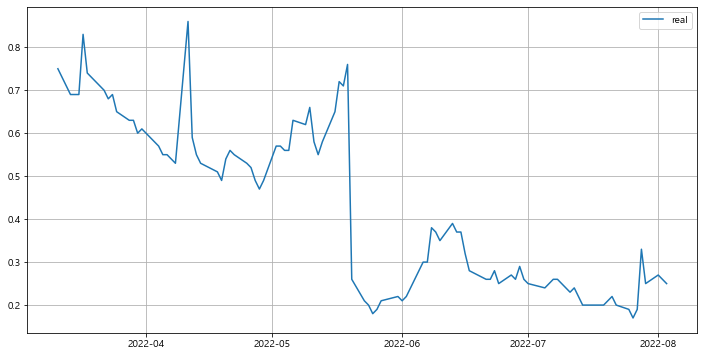

In [225]:
plt.figure(figsize=(12,6))
plt.plot(df_athx['ds'], df_athx['y'], label='real')
plt.grid()
plt.legend()
plt.show()

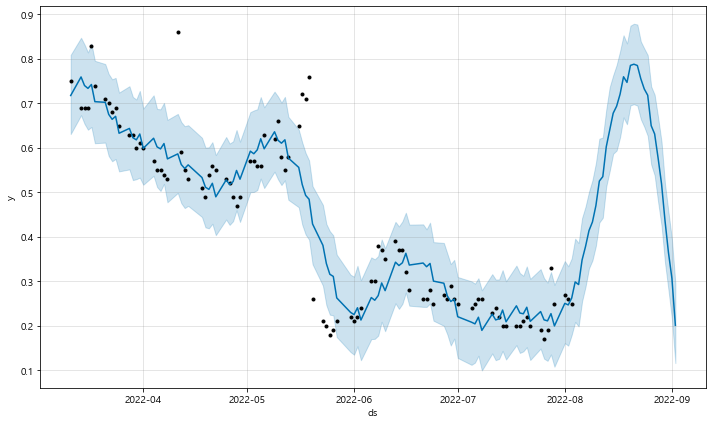

In [226]:
### 예측!
m_athx.plot(forecast);

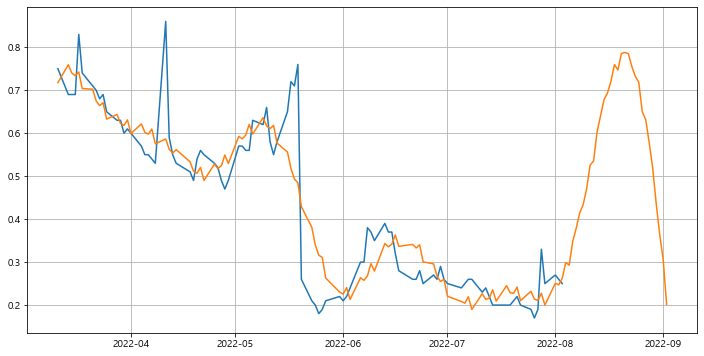

In [227]:
plt.figure(figsize=(12,6))
plt.plot(df_athx['ds'], df_athx['y'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.show()

---
# 조금 특이한 형태의 데이터에 대한 forecast

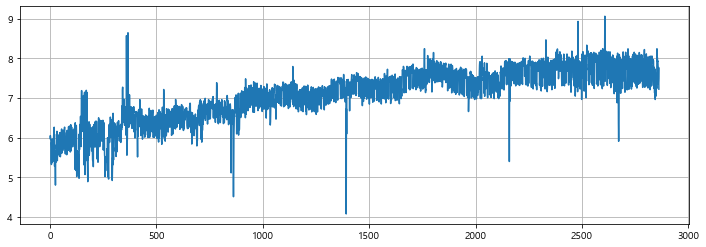

In [230]:
df = pd.read_csv('../data_fbprophet/05_example_wp_R2.csv', index_col=0)
df['y'].plot(figsize=(12,4), grid=True);

## Logistic 성장형 그래프를 가진 데이터

In [231]:
df.columns

Index(['ds', 'y'], dtype='object')

In [232]:
df['cap'] = 8.5     # 기준선(?) 표시용도로 만들어둔듯 하다.

In [234]:
df.head()

,ds,y,cap
0,2008-01-30,5.976351,8.5
1,2008-01-16,6.049733,8.5
2,2008-01-17,6.011267,8.5
3,2008-01-14,5.953243,8.5
4,2008-01-15,5.910797,8.5


In [235]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df);

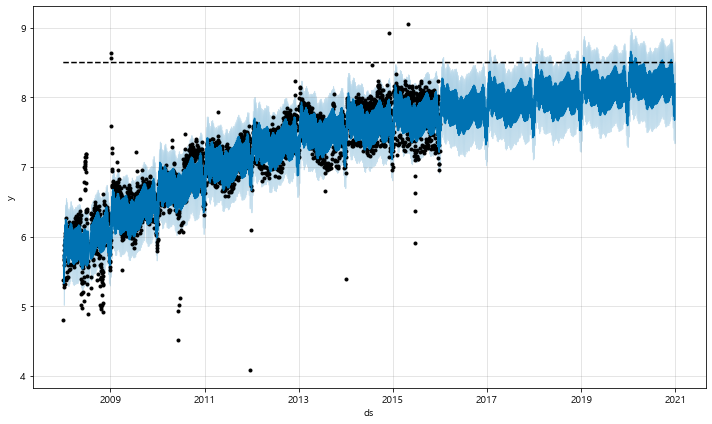

In [236]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

In [240]:
# fcst.columns
fcst[['ds','yhat','yhat_lower','yhat_upper','cap']].head()

,ds,yhat,yhat_lower,yhat_upper,cap
0,2008-01-01,5.698329,5.399856,6.005278,8.5
1,2008-01-02,5.727366,5.454141,6.037829,8.5
2,2008-01-03,5.734362,5.412669,6.027326,8.5
3,2008-01-04,5.666699,5.349818,5.949377,8.5
4,2008-01-05,5.328037,5.020836,5.623260,8.5
